# Customer Credit Risk Modelling:
# Artificial Neural Network

## Introduction

In this exercise, I will be implementing a deep learning (DL) model for the default classification problem. The task is to predict the likelihood of a customer defaulting on telco payments based on their telco data.

The customer dataset I will be using contains information about a fictional telco company that provided home phone and Internet services to 7048 customers. It indicates which customers have left, stayed, or signed up for their service.

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("../dataset/finantier_data_technical_test_dataset.csv", skip_blank_lines=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7044 non-null   object 
 1   gender            7044 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default,Error
0,4808-GHDJN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,error_error
1,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN
2,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,error_error
3,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN
4,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN


## Data Cleaning

In [5]:
# Remove blank rows
df.dropna(how="all", inplace=True)

# Remove rows with errors
df = df[df['Error'].isnull()]

# Remove customerID and Error Columns
df = df.iloc[:, 1:-1]

# Handle missing values for TotalCharges
df = df.replace(' ', 0.0)     

# Convert TotalCharges to Float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

## Data Transformation

In [6]:
ordinal_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
hot_columns = ['PaymentMethod','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']
numerical_columns = ['tenure','MonthlyCharges','TotalCharges']

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

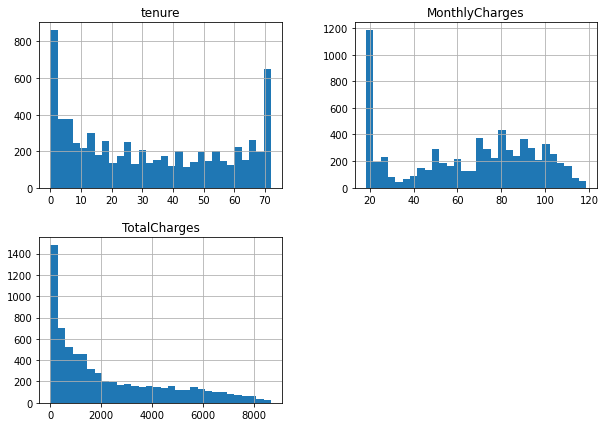

In [7]:
df[["tenure","MonthlyCharges","TotalCharges"]].hist(bins=30, figsize=(10, 7))

In [8]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer(
    (OneHotEncoder(), hot_columns),
    (OrdinalEncoder(), ordinal_columns),
    (StandardScaler(), numerical_columns),
    remainder='passthrough')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Building the Model and Pipeline

In [12]:
from keras.models import Sequential
from keras.layers import Dense

def make_model():
    model = Sequential()
    model.add(Dense(16, input_shape=(40,),activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [13]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

estimator = KerasRegressor(model=make_model, epochs=50, batch_size=100, loss="binary_crossentropy", )

In [14]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(column_trans, estimator)

## Evaluating Model

In [15]:
pipeline.fit(X_train, y_train)

Epoch 1/50


2022-02-19 02:26:20.308482: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


50/50 [==============================] - 0s 1ms/step - loss: 0.7429 - accuracy: 0.4056
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.7372
Epoch 3/50
50/50 [==============================] - 0s 883us/step - loss: 0.6640 - accuracy: 0.7794
Epoch 4/50
50/50 [==============================] - 0s 876us/step - loss: 0.6485 - accuracy: 0.7890
Epoch 5/50
50/50 [==============================] - 0s 865us/step - loss: 0.6251 - accuracy: 0.7942
Epoch 6/50
50/50 [==============================] - 0s 874us/step - loss: 0.5474 - accuracy: 0.8042
Epoch 7/50
50/50 [==============================] - 0s 871us/step - loss: 0.4570 - accuracy: 0.8034
Epoch 8/50
50/50 [==============================] - 0s 869us/step - loss: 0.4277 - accuracy: 0.8030
Epoch 9/50
50/50 [==============================] - 0s 910us/step - loss: 0.4219 - accuracy: 0.8050
Epoch 10/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4185 - accuracy: 0.8064
Epoch 11/50
50/5

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['PaymentMethod',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
   

In [16]:
y_pred = pipeline.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

22/22 [==============================] - 0s 622us/step
[[0 0]
 [0 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)


[[1411  140]
 [ 289  272]]


0.796875

In [18]:
f1_score(y_true= y_test, y_pred= y_pred)

0.5590955806783144

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1551
           1       0.66      0.48      0.56       561

    accuracy                           0.80      2112
   macro avg       0.75      0.70      0.71      2112
weighted avg       0.78      0.80      0.79      2112



## Hyperparameter Tuning

I will be use the [Bayesian Optimization Library](https://github.com/fmfn/BayesianOptimization) to tune the model

Credit to [RendyK](https://www.kaggle.com/rendyk/neural-network-hyperparameter-tuning) whose functions I will be adapting in the following cells

In [20]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier

from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU

from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

LeakyReLU = LeakyReLU(alpha=0.1)

In [21]:
score_acc = make_scorer(accuracy_score)
transformed_X_train = column_trans.fit_transform(X_train)

# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
                 'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
        
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
        
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)

    def nn_cl_func():
        nn = Sequential()
        nn.add(Dense(neurons, input_shape=(40,), activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=111))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
        
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_func, epochs=epochs, batch_size=batch_size, verbose=0)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=111)
    score = cross_val_score(nn, transformed_X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    
    return score

## Bayesian Optimization

In [23]:
params_nn ={
    'neurons': (10, 80),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(100, 500),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}


# Run Bayesian Optimization
try:
    nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
    nn_bo.maximize(init_points=10, n_iter=4)
except:
    print("Done")

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7991   |  5.51     |  167.6    |  0.4361   |  0.2308   |  43.63    |  1.298    |  1.045    |  0.426    |  26.71    |  0.3377   |  6.935    |
|  2        |  0.7431   |  2.14     |  132.5    |  0.6696   |  0.1864   |  41.94    |  1.932    |  1.237    |  0.08322  |  73.05    |  0.794    |  5.884    |
|  3        |  0.7346   |  7.337    |  496.4    |  0.5773   |  0.2441   |  53.71    |  1.055    |  1.908    |  0.1143   |  67.21    |  0.6977   |  3.957    |
|  4        |  0.7346   |  2.468    |  499.4    |  0.138    |  0.1846   |  58.8     |  1.81     |  2.456    |  0.3296   |  38.04    |  0.319    |  6.631    |
|  5        |  0.7752   |  8.268    |  425.5    |  0

In [24]:
params_nn_ = nn_bo.max['params']

learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]

params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])

optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
             'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
             'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]

params_nn_

{'activation': 'elu',
 'batch_size': 168,
 'dropout': 0.4360590193711702,
 'dropout_rate': 0.23077874175693686,
 'epochs': 44,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.42602224734191213,
 'neurons': 27,
 'normalization': 0.33765619188879237,
 'optimizer': <keras.optimizer_v2.ftrl.Ftrl at 0x158c2da80>}

## Building the Optimized Model


In [25]:
def nn_cl_func():
    nn = Sequential()
    nn.add(Dense(params_nn_['neurons'], input_shape=(40,), activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
        nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
    return nn

In [26]:
es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_func, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                         verbose=0)

In [27]:
from sklearn.pipeline import make_pipeline

optimized_pipeline = make_pipeline(column_trans, nn)

## Evaluating the optimized model

In [28]:
optimized_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['PaymentMethod',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
   

In [29]:
new_preds = optimized_pipeline.predict(X_test)
new_preds = (new_preds > 0.5)
accuracy_score(y_test, new_preds)

0.7982954545454546

In [30]:
confusion_matrix(y_test, new_preds)

array([[1403,  148],
       [ 278,  283]])

In [31]:
f1_score(y_true= y_test, y_pred= new_preds)

0.5705645161290324

In [32]:
print(classification_report(y_test, new_preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1551
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2112
   macro avg       0.75      0.70      0.72      2112
weighted avg       0.79      0.80      0.79      2112



## Further Evaluation

Evalauting Normal Model:

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

train_set_preds = [round(x) for x in pipeline.predict(X_train)]
test_set_preds = [round(x) for x in pipeline.predict(X_test)]

print('Accuracy for test set: %0.4f' % accuracy_score(y_test, test_set_preds))
print('Accuracy for train set: %0.4f' % accuracy_score(y_train, train_set_preds))

print('\n')

print('Precision for test set: %0.4f' % precision_score(y_test, test_set_preds))
print('Precision for train set: %0.4f' % precision_score(y_train, train_set_preds))

print('\n')

print('Recall for test set: %0.4f' % recall_score(y_test, test_set_preds))
print('Recall for train set: %0.4f' % recall_score(y_train, train_set_preds))

22/22 [==============================] - 0s 648us/step
Accuracy for test set: 0.7969
Accuracy for train set: 0.8176


Precision for test set: 0.6602
Precision for train set: 0.6987


Recall for test set: 0.4848
Recall for train set: 0.5497


Evalauting Optimized Model:

In [34]:
train_set_preds = [round(x) for x in optimized_pipeline.predict(X_train)]
test_set_preds = [round(x) for x in optimized_pipeline.predict(X_test)]

print('Accuracy for test set: %0.4f' % accuracy_score(y_test, test_set_preds))
print('Accuracy for train set: %0.4f' % accuracy_score(y_train, train_set_preds))

print('\n')

print('Precision for test set: %0.4f' % precision_score(y_test, test_set_preds))
print('Precision for train set: %0.4f' % precision_score(y_train, train_set_preds))

print('\n')

print('Recall for test set: %0.4f' % recall_score(y_test, test_set_preds))
print('Recall for train set: %0.4f' % recall_score(y_train, train_set_preds))

Accuracy for test set: 0.7983
Accuracy for train set: 0.8123


Precision for test set: 0.6566
Precision for train set: 0.6805


Recall for test set: 0.5045
Recall for train set: 0.5520


## Saving the Model

In [ ]:
import joblib

joblib.dump(pipeline, "pipeline.joblib")